<a href="https://colab.research.google.com/github/EmamulHossen/CoustomerChunPrediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

**Read the dataset**

**The goal of this dataset is to customer churn prediction i.e the customer who take the service for next month or not.**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Customer-Churn-Prediction.csv")

In [ ]:
df1=df.copy()

In [ ]:
df.head(5) # This dataset is an ISP Company .it is a internet service company.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape # Shape of the dataset.

(7043, 21)

In [ ]:
df.columns # All columns of the dataset.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().any() # Check the Null Value.

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
not_churned=(5174)/(5174+1869)*100

In [ ]:
not_churned #73% customer not churn for next month.

73.4630129206304

In [ ]:
# Percentage of churn customer
churned=(1869)/(5174+1869)*100

In [ ]:
churned #26% customer will be churned for next month.

26.536987079369588

In [ ]:
print("Not churned {} percentage of total people".format(not_churned))
print("Churned {} percentage of total people".format(churned))

Not churned 73.4630129206304 percentage of total people
Churned 26.536987079369588 percentage of total people


<Axes: xlabel='Churn', ylabel='count'>

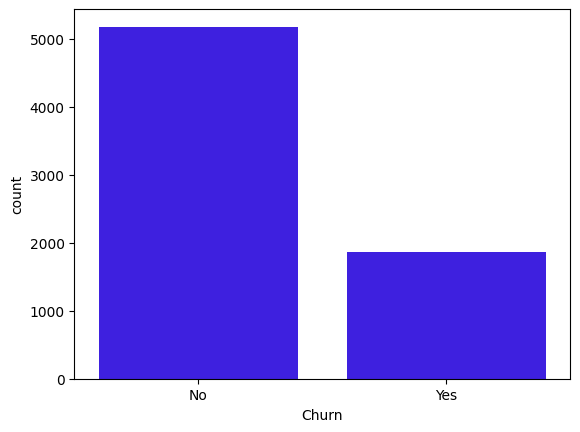

In [ ]:
sns.countplot(x=df["Churn"],color="#2800FF")

<Axes: xlabel='Churn', ylabel='count'>

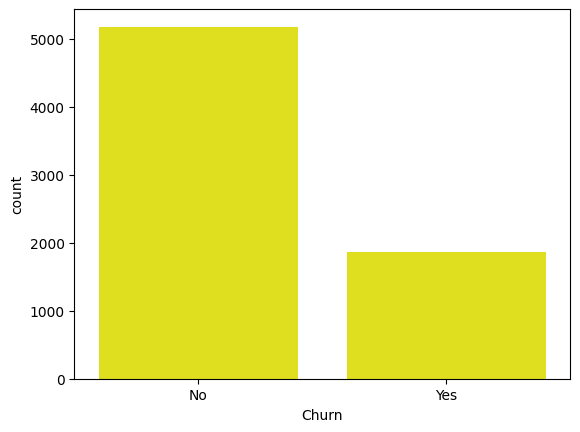

In [ ]:
sns.countplot(x=df["Churn"],color="yellow")

In [ ]:
df.duplicated() # Checking duplicates value.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
df.drop_duplicates(inplace=True) # Here drop duplicate value.But in this dataset no duplicates value.

In [ ]:
df.shape

(7043, 21)

# **Basic Visualization using seaborn Library**

<Axes: xlabel='count', ylabel='gender'>

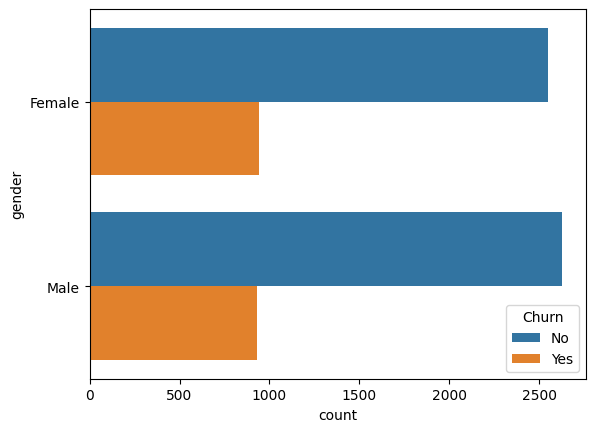

In [ ]:
sns.countplot(y="gender",hue="Churn",data=df)

<Axes: xlabel='gender', ylabel='count'>

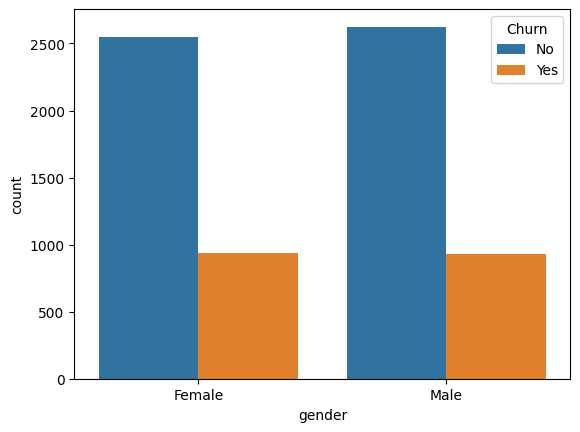

In [ ]:
sns.countplot(x="gender",hue="Churn",data=df)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

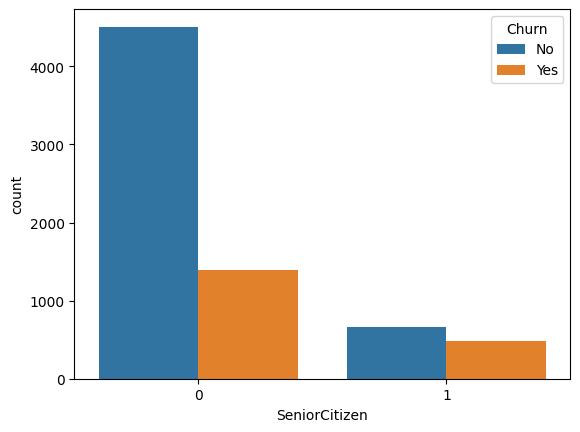

In [ ]:
sns.countplot(x=df["SeniorCitizen"],hue="Churn",data=df)

<Axes: xlabel='Partner', ylabel='count'>

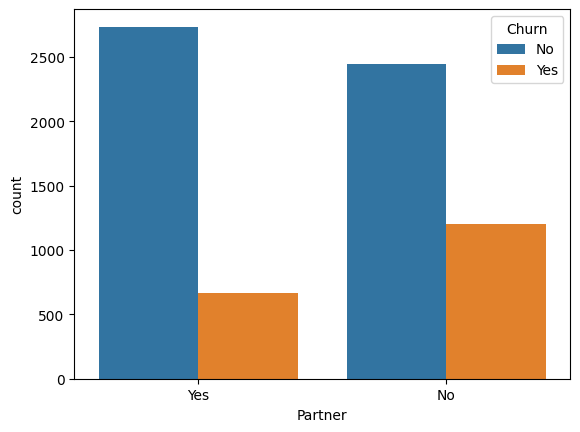

In [ ]:
sns.countplot(x=df['Partner'],hue="Churn",data=df)

<Axes: xlabel='Dependents', ylabel='count'>

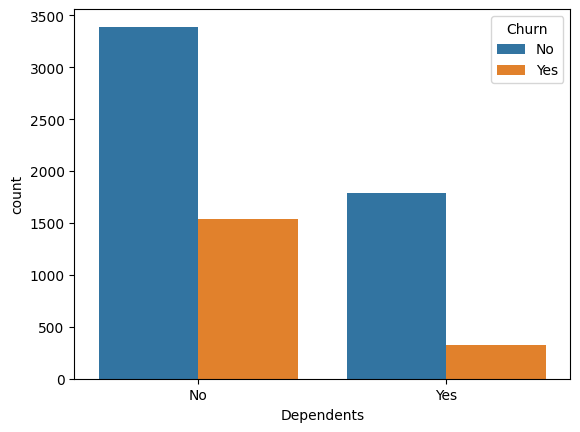

In [ ]:
sns.countplot(x=df['Dependents'],hue="Churn",data=df)

<Axes: xlabel='tenure', ylabel='count'>

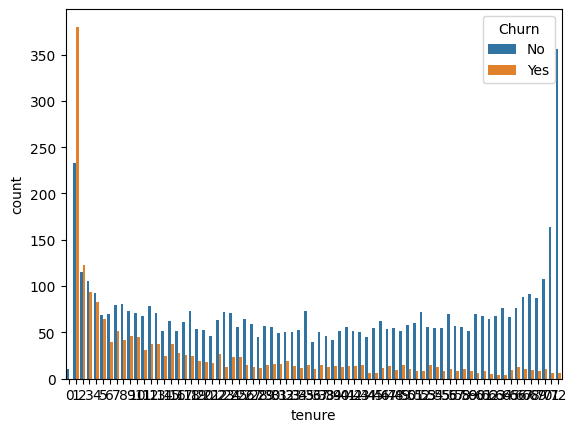

In [ ]:
sns.countplot(x=df['tenure'],hue="Churn",data=df)

<Axes: xlabel='tenure', ylabel='count'>

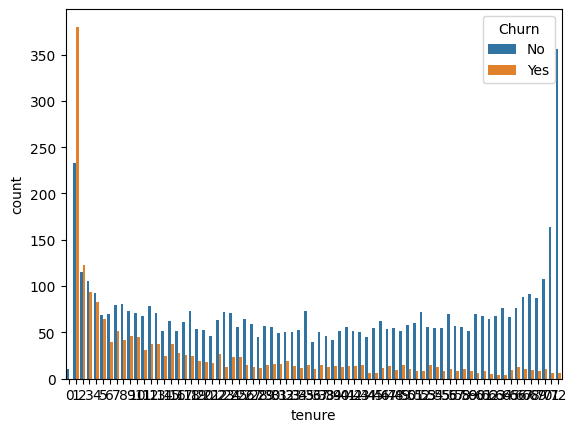

In [ ]:
sns.countplot(x=df['tenure'],hue="Churn",data=df)

<Axes: xlabel='MultipleLines', ylabel='count'>

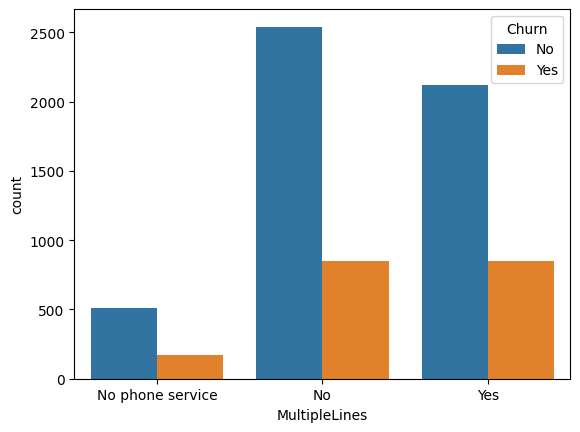

In [ ]:
sns.countplot(x=df['MultipleLines'],hue="Churn",data=df)

<Axes: xlabel='InternetService', ylabel='count'>

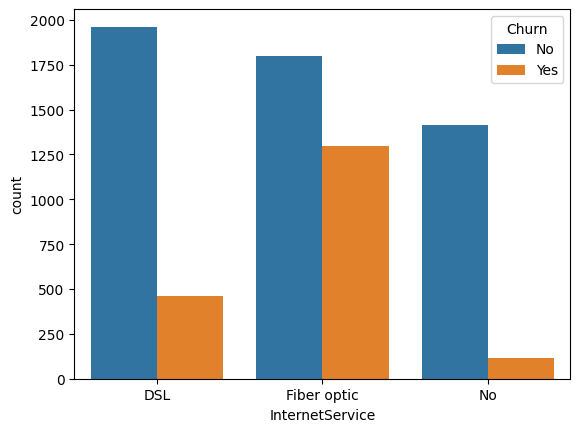

In [ ]:
sns.countplot(x=df['InternetService'],hue="Churn",data=df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

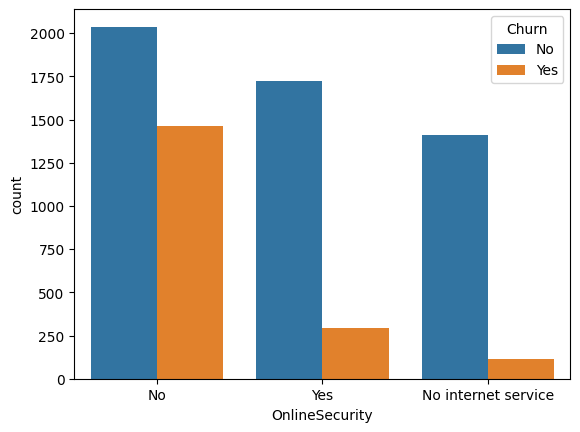

In [ ]:
sns.countplot(x=df['OnlineSecurity'],hue="Churn",data=df)

<Axes: xlabel='DeviceProtection', ylabel='count'>

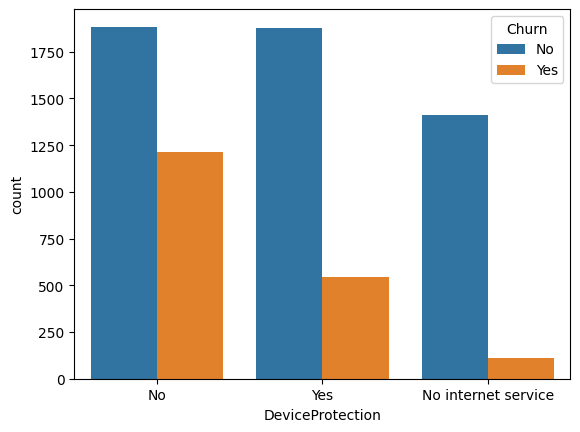

In [ ]:
sns.countplot(x=df['DeviceProtection'],hue="Churn",data=df)

<Axes: xlabel='TechSupport', ylabel='count'>

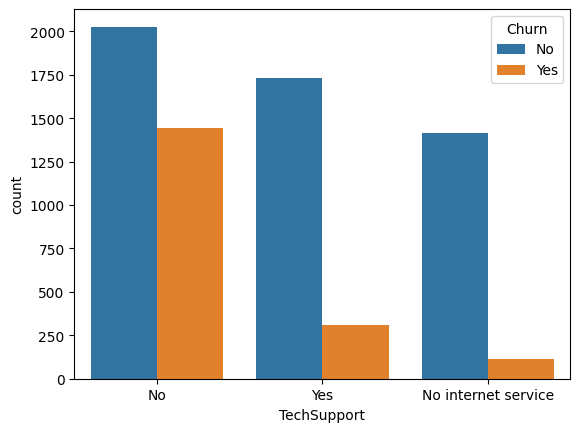

In [ ]:
sns.countplot(x=df['TechSupport'],hue="Churn",data=df)

<Axes: xlabel='StreamingTV', ylabel='count'>

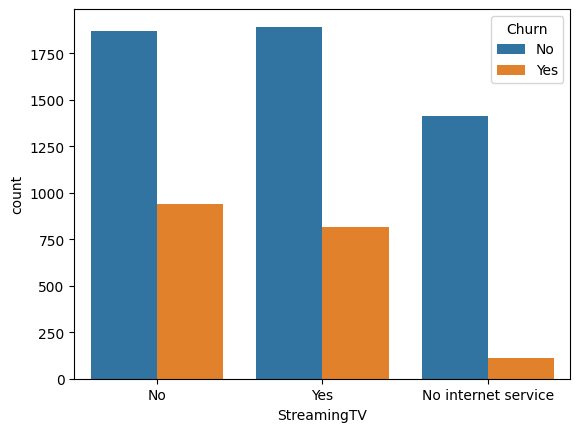

In [ ]:
sns.countplot(x=df['StreamingTV'],hue="Churn",data=df)

<Axes: xlabel='StreamingMovies', ylabel='count'>

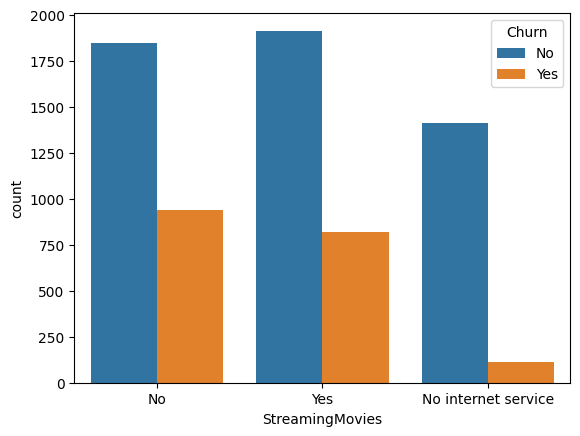

In [ ]:
sns.countplot(x=df['StreamingMovies'],hue="Churn",data=df)

<Axes: xlabel='Contract', ylabel='count'>

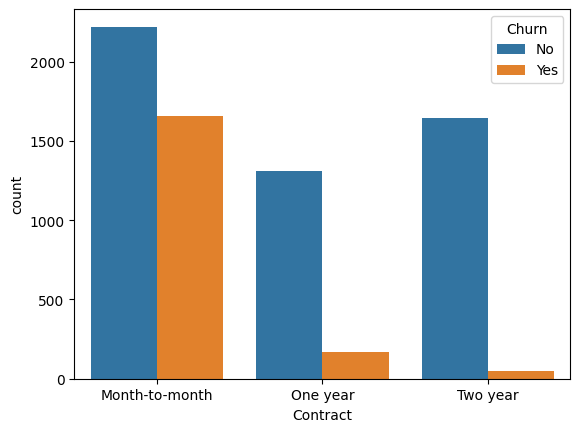

In [ ]:
sns.countplot(x=df['Contract'],hue="Churn",data=df)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

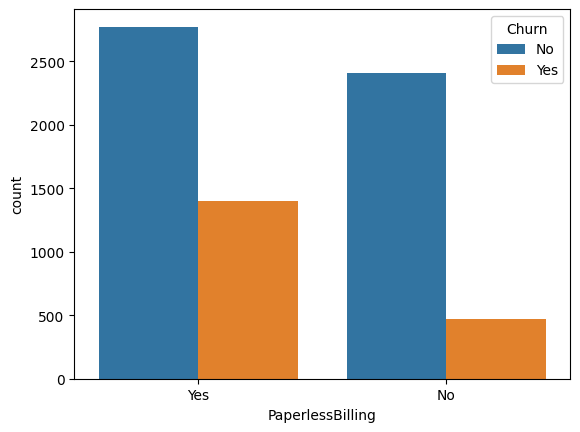

In [ ]:
sns.countplot(x=df['PaperlessBilling'],hue="Churn",data=df)

<Axes: xlabel='count', ylabel='PaymentMethod'>

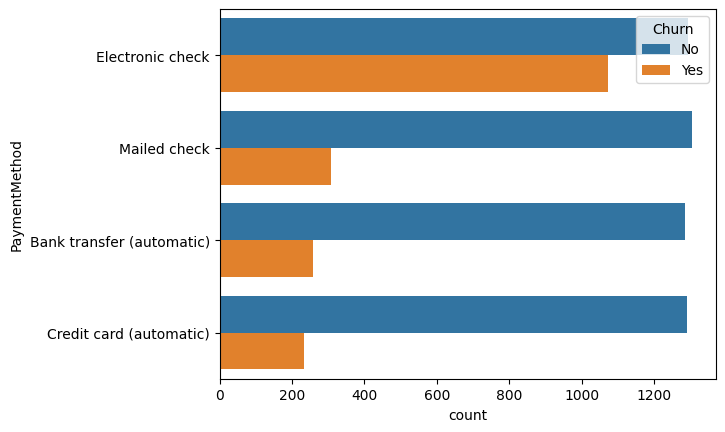

In [ ]:
sns.countplot(y=df['PaymentMethod'],hue="Churn",data=df)

# **Preprocess The Dataset**

In [ ]:
#Drop the customer ID
df=df.drop("customerID",axis=1)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Encode the Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
L_encoder=LabelEncoder

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
from pandas.core.dtypes.common import is_numeric_dtype


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

import pandas as pd
from pandas.api.types import is_numeric_dtype


for column in df.columns:

    f=(is_numeric_dtype(df[column]))


    if f==False:

        data=df[column]

        df[column]= le.fit_transform(data)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


**Separate X & Y**

In [ ]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
x.shape

(7043, 19)

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
y.shape

(7043,)

# **Imbalanced Data Handling**

In [ ]:
df["Churn"].value_counts() # 0=NO,1=Yes

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
print("Not churned {} percentage of total people".format(not_churned))
print("Churned {} percentage of total people".format(churned))

Not churned 73.4630129206304 percentage of total people
Churned 26.536987079369588 percentage of total people


# **Synthetic Minority Oversampling Technique(SMOTETomek)**

In [ ]:
import imblearn

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
#Creating Object
sm=SMOTETomek(random_state=100)

In [ ]:
#Before sampling
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
X,Y=sm.fit_resample(x,y)

In [ ]:
X.shape

(9652, 19)

In [ ]:
Y.shape

(9652,)

In [ ]:
Y.value_counts()

0    4826
1    4826
Name: Churn, dtype: int64

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
1,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550


In [ ]:
X.shape

(9652, 19)

# **Near Miss for Under Sampling**

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
#Creating Object\
nm=NearMiss()

In [ ]:
new_x,new_y=nm.fit_resample(x,y)

In [ ]:
new_x.shape

(3738, 19)

In [ ]:
new_y.shape

(3738,)

In [ ]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# **OverSampling**

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df1["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
om=RandomOverSampler(random_state=100)

In [ ]:
x_new,y_new=om.fit_resample(x,y)

In [ ]:
x_new.shape

(10348, 19)

In [ ]:
y_new.shape

(10348,)

In [ ]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# **Cross Validation**


>**Hold out Cross Validation**
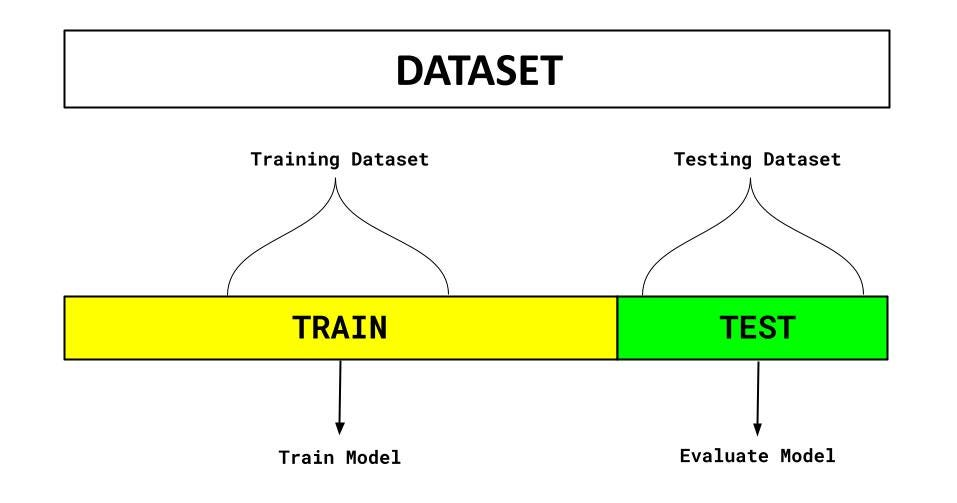


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,train_size=0.75,random_state=42)

In [ ]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [ ]:
y_train.head()

3520     0
5262     0
10333    1
4058     1
7089     1
Name: Churn, dtype: int64

In [ ]:
#Model
from sklearn import tree

In [ ]:
clf=tree.DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(x_test,y_test)

0.8627754155392346

# **Without Sampling**

> Here x & y are imbalanced old data



In [ ]:
x.shape

(7043, 19)

In [ ]:
y.shape

(7043,)

In [ ]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,train_size=0.75,random_state=42)

In [ ]:
clf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [ ]:
clf.score(xtest1,ytest1)

0.730266893810335

# **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.score(x_test,y_test)

0.860456126787785

# **Before Sampling**

In [ ]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.score(xtrain1,ytrain1)

0.9392275653161681

# **Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad_b=AdaBoostClassifier()

In [ ]:
ad_b.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
ad_b.score(x_test,y_test)

0.7715500579822188

**Before Sampling**

In [ ]:
ad_b.fit(xtrain1,ytrain1)

AdaBoostClassifier()

In [ ]:
ad_b.score(x_test,y_test)

0.7212988017008117

# **Cross Validation**

> **1.K Fold Cross Validation:**<br/>
>  **K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds**

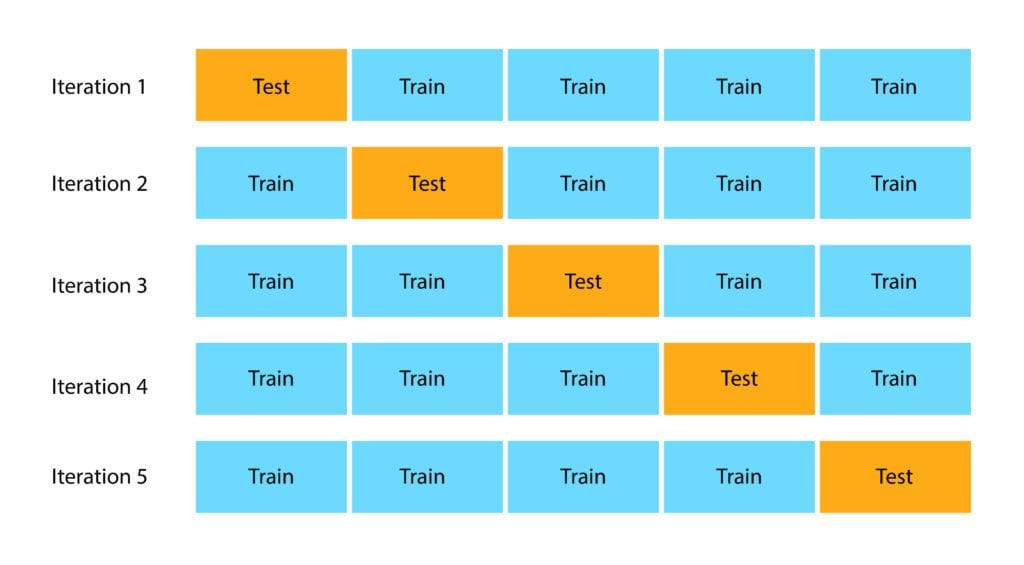



In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
k_fold=KFold(n_splits=5,shuffle=True) # Each fold contain 25% data

In [ ]:
result=cross_val_score(xgb,x_new,y_new,cv=k_fold)

In [ ]:
print(result)

[0.85555556 0.86135266 0.85217391 0.86176897 0.85548574]


In [ ]:
result.mean()

0.8572673676050648

In [ ]:
result.max()

0.8617689705171581

In [ ]:
result.min()

0.8521739130434782

# **Stratified K fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
st=StratifiedKFold(n_splits=5)

In [ ]:
score2=cross_val_score(xgb,x_new,y_new,cv=st)

In [ ]:
print(score2)

[0.84975845 0.85700483 0.86714976 0.8699855  0.88641856]


In [ ]:
score2.mean()

0.866063420682119

In [ ]:
score2.max()

0.8864185596906718

In [ ]:
score2.min()

0.8497584541062801

# **Leave One Out Cross Validation**

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
loo=LeaveOneOut()

In [ ]:
#result3=cross_val_score(xgb,x_new,y_new,cv=loo)

In [ ]:
#print(result3)

In [ ]:
#result3.mean()

In [ ]:
result3.max()

In [ ]:
result3.min()